# Import

## Setup

**Importa a biblioteca Pandas, usada para manipulação e análise de dados tabulares**

```import pandas as pd```

**Importa a biblioteca NumPy, utilizada para operações matemáticas e manipulação de arrays multidimensionais**

```import numpy as np```

**Importa a biblioteca Matplotlib, usada para criar gráficos em 2D**

```import matplotlib.pyplot as plt```

**Importa a biblioteca Seaborn que oferece uma interface mais simples para a criação de gráficos estatísticos**

```import seaborn as sns```

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importa funções do IPython para exibir DataFrames e texto formatado em Markdown.
from IPython.display import display, Markdown

# Configura o tema do seaborn para gráficos com grade escura
sns.set_theme(style="darkgrid")

# Configura o Pandas para exibir todas as colunas ao imprimir DataFrames
pd.set_option('display.max_columns', None)

# Importa módulos necessários para manipulação de caminhos e configuração
import sys, os, yaml

# Define uma constante para o nome do dataset
DATASET = "Apple-Quality"

# Verifica se o código está sendo executado no Google Colab
COLAB = 'google.colab' in sys.modules

# Define uma constante de depuração (debug), pode ser utilizada para controlar
# a exibição de mensagens de depuração ao longo do código
DEBUG = False

# Define a semente para geração de números aleatórios, garantindo reprodutibilidade
SEED = 666

In [29]:
# Verifica novamente se o código está sendo executado no Google Colab
COLAB = 'google.colab' in sys.modules

if COLAB:
  # Importa o módulo para montagem do Google Drive no Colab
  from google.colab import drive
  
  # Verifica se o Google Drive já está montado; se não, monta-o
  if not os.path.isdir("/content/gdrive"):
    drive.mount("/content/gdrive")
    
    # Define o caminho para a pasta de datasets dentro do Google Drive
    d = "/content/gdrive/MyDrive/datasets"
    
    # Cria a pasta 'datasets' se ela não existir
    if not os.path.isdir(ROOT+d): os.makedirs(ROOT+d)
    
  # Define o caminho raiz do dataset no Google Drive
  ROOT = f"/content/gdrive/MyDrive/datasets/{DATASET.replace(' ','_')}/"
  
  # Cria a pasta do dataset se ela não existir
  if not os.path.isdir(ROOT): os.makedirs(ROOT)
else:
  # Se não estiver no Colab, define o caminho raiz local como o diretório atual
  ROOT = "./"

# Função para criar diretórios, considerando se o código está sendo executado no Colab ou não
def makedirs(d):
  if COLAB:
    # No Colab, cria o diretório dentro do caminho ROOT se ele não existir
    if not os.path.isdir(ROOT+d): os.makedirs(ROOT+d)
  else:
    # Localmente, cria o diretório com permissões específicas se ele não existir
    if not os.path.isdir(ROOT+d): os.makedirs(ROOT+d, mode=0o777, exist_ok=True)

# Cria os diretórios 'orig', 'data' e 'output' dentro do caminho ROOT
for d in ['orig','data','output']: makedirs(d)

## Load Dataset

In [30]:
# Lê um arquivo CSV chamado "apple_quality.csv" localizado no diretório "orig" dentro do caminho ROOT 
# e o armazena em um DataFrame chamado df.
df = pd.read_csv(f"{ROOT}/orig/apple_quality.csv")

In [26]:
# Modifica os nomes das colunas do DataFrame para que cada palavra seja capitalizada (primeira letra maiúscula) 
# e substitui os espaços por underscores (_).
df.columns = [c.title().replace(' ', '_') for c in df.columns]

# Exibe a lista de nomes das colunas após a modificação.
df.columns

Index(['A_Id', 'Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness',
       'Ripeness', 'Acidity', 'Quality'],
      dtype='object')

In [27]:
# Exibe um resumo informativo sobre o DataFrame, incluindo o número de entradas, 
# tipos de dados de cada coluna, e o uso de memória.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_Id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


In [7]:
# Aplica estilo ao DataFrame transposto, adicionando um gradiente de cor como plano de fundo para cada coluna.
# O gradiente é aplicado ao longo das colunas (axis=0) usando o mapa de cores 'cubehelix'.
df.describe().T.style.background_gradient(axis=0, cmap='cubehelix')

,count,mean,std,min,25%,50%,75%,max
A_Id,4000.000000,1999.500000,1154.844867,0.000000,999.750000,1999.500000,2999.250000,3999.000000
Size,4000.000000,-0.503015,1.928059,-7.151703,-1.816765,-0.513703,0.805526,6.406367
Weight,4000.000000,-0.989547,1.602507,-7.149848,-2.011770,-0.984736,0.030976,5.790714
Sweetness,4000.000000,-0.470479,1.943441,-6.894485,-1.738425,-0.504758,0.801922,6.374916
Crunchiness,4000.000000,0.985478,1.402757,-6.055058,0.062764,0.998249,1.894234,7.619852
Juiciness,4000.000000,0.512118,1.930286,-5.961897,-0.801286,0.534219,1.835976,7.364403
Ripeness,4000.000000,0.498277,1.874427,-5.864599,-0.771677,0.503445,1.766212,7.237837


In [8]:
# Verifica se há linhas duplicadas no DataFrame.
# O método duplicated() retorna uma série booleana indicando se cada linha é uma duplicata (True) ou não (False).
# O método sum() então soma os valores True (que são tratados como 1), 
# dando o número total de linhas duplicadas no DataFrame.
df.duplicated().sum()

0

In [9]:
# Itera sobre cada coluna no DataFrame.
for column in df.columns:
    # Calcula o número de valores distintos (únicos) na coluna atual.
    num_distinct_values = len(df[column].unique())
    # Imprime o nome da coluna seguido pelo número de valores distintos que ela contém.
    print(f"{column}: {num_distinct_values} distinct values")

A_Id: 4001 distinct values
Size: 4001 distinct values
Weight: 4001 distinct values
Sweetness: 4001 distinct values
Crunchiness: 4001 distinct values
Juiciness: 4001 distinct values
Ripeness: 4001 distinct values
Acidity: 4001 distinct values
Quality: 3 distinct values


In [10]:
# Verifica se há linhas duplicadas no DataFrame.
# O método duplicated() retorna uma série booleana indicando se cada linha é uma duplicata (True) ou não (False).
# O método sum() então soma os valores True (que são tratados como 1), 
# dando o número total de linhas duplicadas no DataFrame.
df.duplicated().sum()

0

In [24]:
# Identifica e seleciona todas as linhas no DataFrame `df` que contêm pelo menos um valor nulo.
# `df.isnull()` retorna um DataFrame booleano, onde True indica a presença de um valor nulo.
# `any(axis=1)` verifica se há pelo menos um valor True (nulo) ao longo de cada linha (axis=1).
# `df[...]` retorna apenas as linhas do DataFrame original onde a condição é verdadeira.
df[df.isnull().any(axis=1)]

,A_Id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
4000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Created_by_Nidula_Elgiriyewithana,NaN


## Análise Exploratória

In [12]:
def clean_data(df):
    # Remove a coluna 'A_Id' do DataFrame, que pode ser considerada irrelevante para a análise ou modelo.
    df = df.drop(columns=['A_Id'])
    
    # Remove todas as linhas que contêm valores nulos, garantindo que o DataFrame resultante não tenha dados ausentes.
    df = df.dropna()
    
    # Converte a coluna 'Acidity' para o tipo de dado 'float64', garantindo que todos os valores sejam tratados
    # como números de ponto flutuante.
    df = df.astype({'Acidity': 'float64'})
    
    # Define uma função interna para transformar os valores da coluna 'Quality'.
    def label(Quality):
        """
        Transforma os valores de 'Quality' de acordo com os exemplos:
        "good"  => 0
        "bad"   => 1
        """
        if Quality == "good":
            return 0
    
        if Quality == "bad":
            return 1
    
        # Retorna None se o valor não for "good" nem "bad", o que pode indicar um valor inesperado.
        return None
    
    # Aplica a função 'label' à coluna 'Quality' e cria uma nova coluna chamada 'Target' com os valores transformados.
    df['Target'] = df['Quality'].apply(label)
    
    # Remove a coluna original 'Quality', já que seus valores foram transformados e armazenados em 'Target'.
    df = df.drop(columns=['Quality'])
    
    # Converte a coluna 'Target' para o tipo 'int64', garantindo que todos os valores sejam inteiros.
    df = df.astype({'Target': 'int64'})
    
    # Retorna o DataFrame limpo e transformado.
    return df

# Cria uma cópia do DataFrame original e aplica a função 'clean_data' para limpá-lo e transformá-lo.
df_clean = clean_data(df.copy())

# Exibe as primeiras linhas do DataFrame limpo, permitindo uma visualização rápida do resultado.
df_clean.head()


,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Target
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,0
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,0
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,1
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,0
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,0


## Visualização    

<div style="background-color: #BEBADA; padding: 15px; border-radius: 10px;">
    <p style="color: black; font-size: 14px; font-weight: bold;">
      3.2.1  Univariate 
    </p>
</div>


c:\Users\izalo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\izalo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\izalo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\izalo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

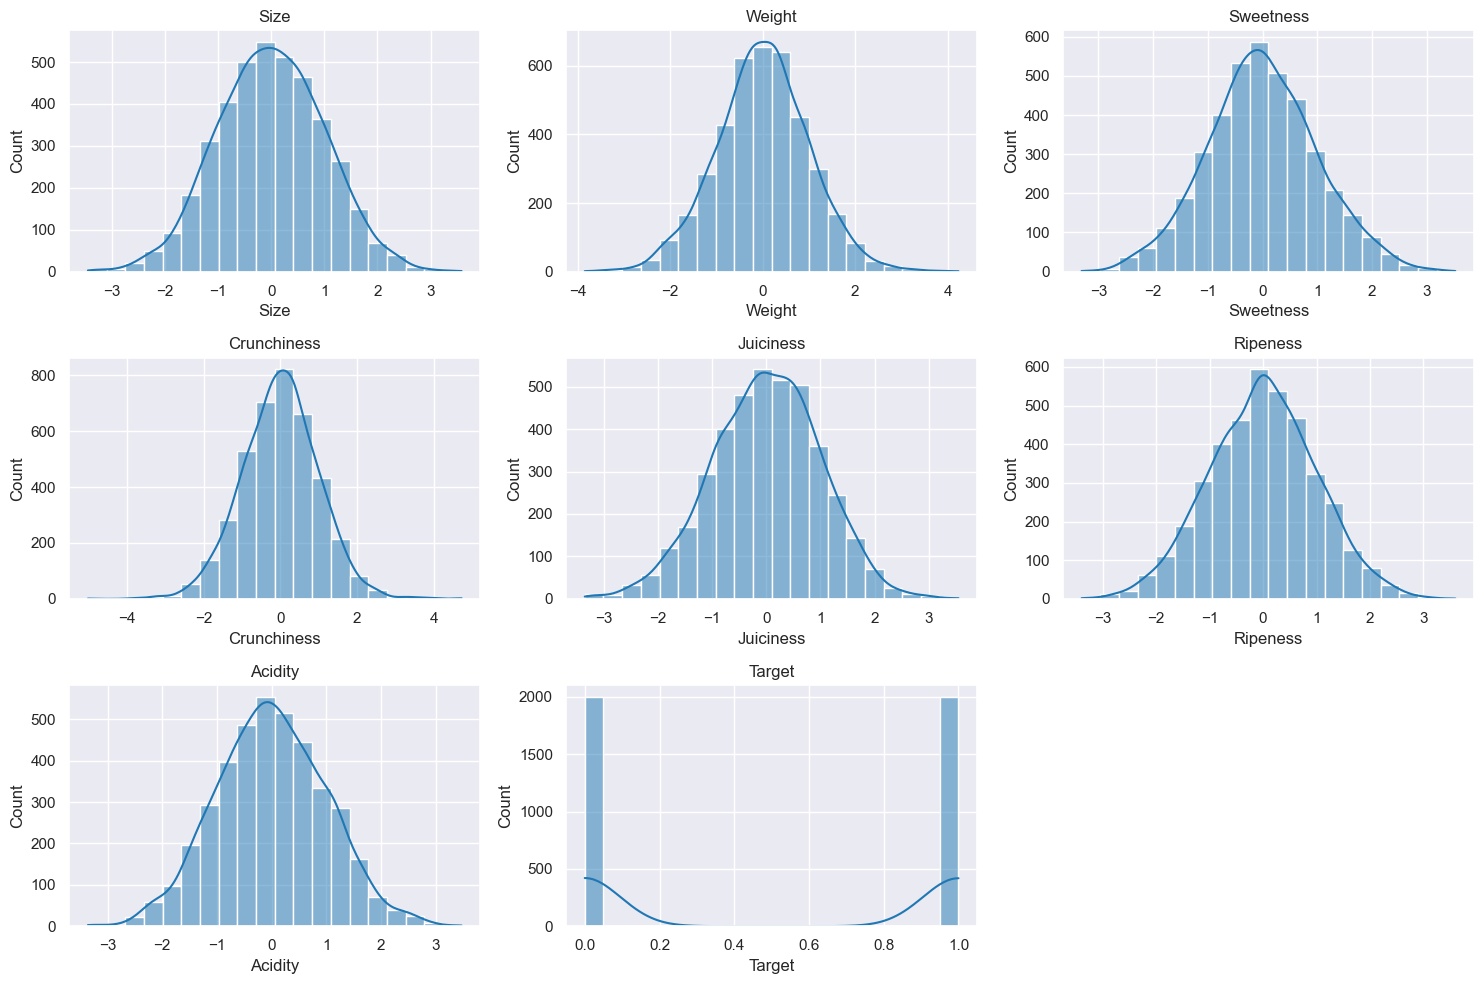

In [31]:
# Define uma lista com os nomes das colunas numéricas do DataFrame, incluindo a coluna 'Target' criada anteriormente.
numerical_cols = ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity', 'Target']

# Cria uma nova figura para os gráficos, definindo o tamanho da figura como 15x10 polegadas.
plt.figure(figsize=(15, 10))

# Define a paleta de cores "tab10" para ser usada nos gráficos.
sns.set_palette("tab10")

# Inicia um loop para criar um gráfico de distribuição (histograma) para cada coluna numérica.
for i, column in enumerate(numerical_cols, 1):
    # Cria um subplot em uma grade de 3x3 (3 linhas e 3 colunas).
    # 'i' indica a posição do subplot atual.
    plt.subplot(3, 3, i)
    
    # Cria um histograma com a densidade de kernel (KDE) para a coluna atual.
    # 'data=df_clean' especifica o DataFrame a ser usado.
    # 'x=column' indica a coluna que está sendo plotada.
    # 'kde=True' adiciona a curva KDE ao histograma para suavizar a visualização da distribuição.
    # 'bins=20' define o número de bins (intervalos) no histograma.
    sns.histplot(data=df_clean, x=column, kde=True, bins=20)
    
    # Define o título do subplot com o nome da coluna atual.
    plt.title(column)

# Ajusta o layout dos subplots para que não haja sobreposição e tudo seja visível.
plt.tight_layout()

# Exibe todos os gráficos gerados.
plt.show()



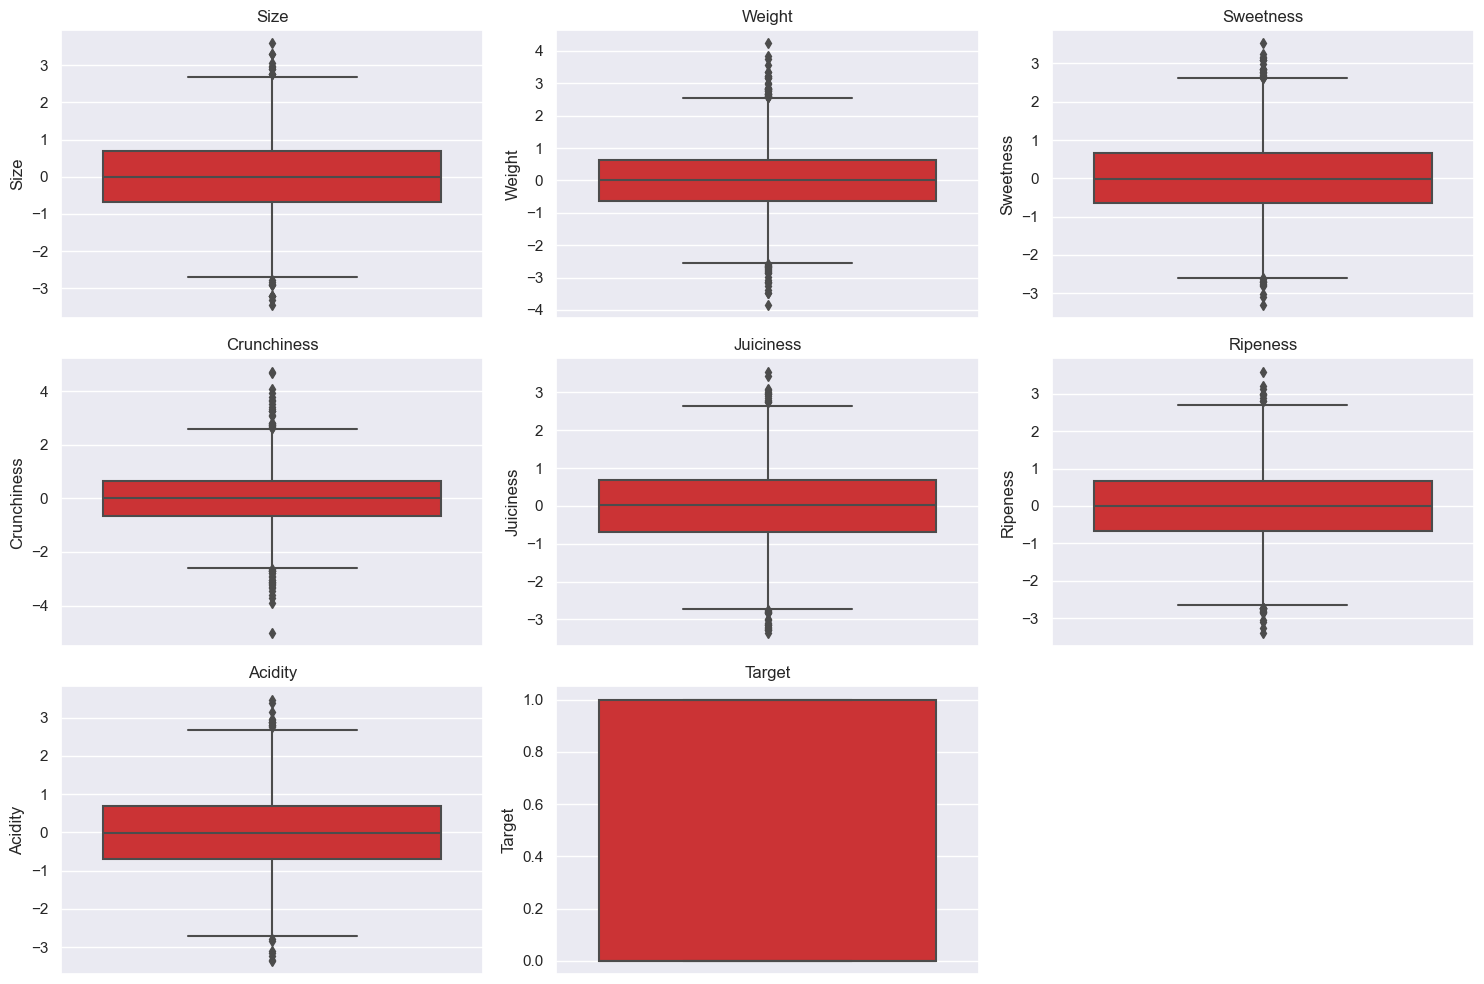

In [32]:
# Define uma lista com os nomes das colunas numéricas do DataFrame, incluindo a coluna 'Target'.
numerical_cols = ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity', 'Target']

# Cria uma nova figura para os gráficos, definindo o tamanho da figura como 15x10 polegadas.
plt.figure(figsize=(15, 10))

# Define a paleta de cores "Set1" para ser usada nos gráficos.
sns.set_palette("Set1")

# Inicia um loop para criar um boxplot para cada coluna numérica.
for i, column in enumerate(numerical_cols, 1):
    # Cria um subplot em uma grade de 3x3 (3 linhas e 3 colunas).
    # 'i' indica a posição do subplot atual.
    plt.subplot(3, 3, i)
    
    # Cria um boxplot para a coluna atual.
    # 'y=df_clean[column]' especifica a coluna a ser plotada no eixo y.
    sns.boxplot(y=df_clean[column])
    
    # Define o título do subplot com o nome da coluna atual.
    plt.title(column)

# Ajusta o layout dos subplots para que não haja sobreposição e tudo seja visível.
plt.tight_layout()

# Exibe todos os gráficos gerados.
plt.show()


<div style="background-color: #BEBADA; padding: 15px; border-radius: 10px;">
    <p style="color: black; font-size: 14px; font-weight: bold;">
      3.2.2  Bivariate 
    </p>
</div>


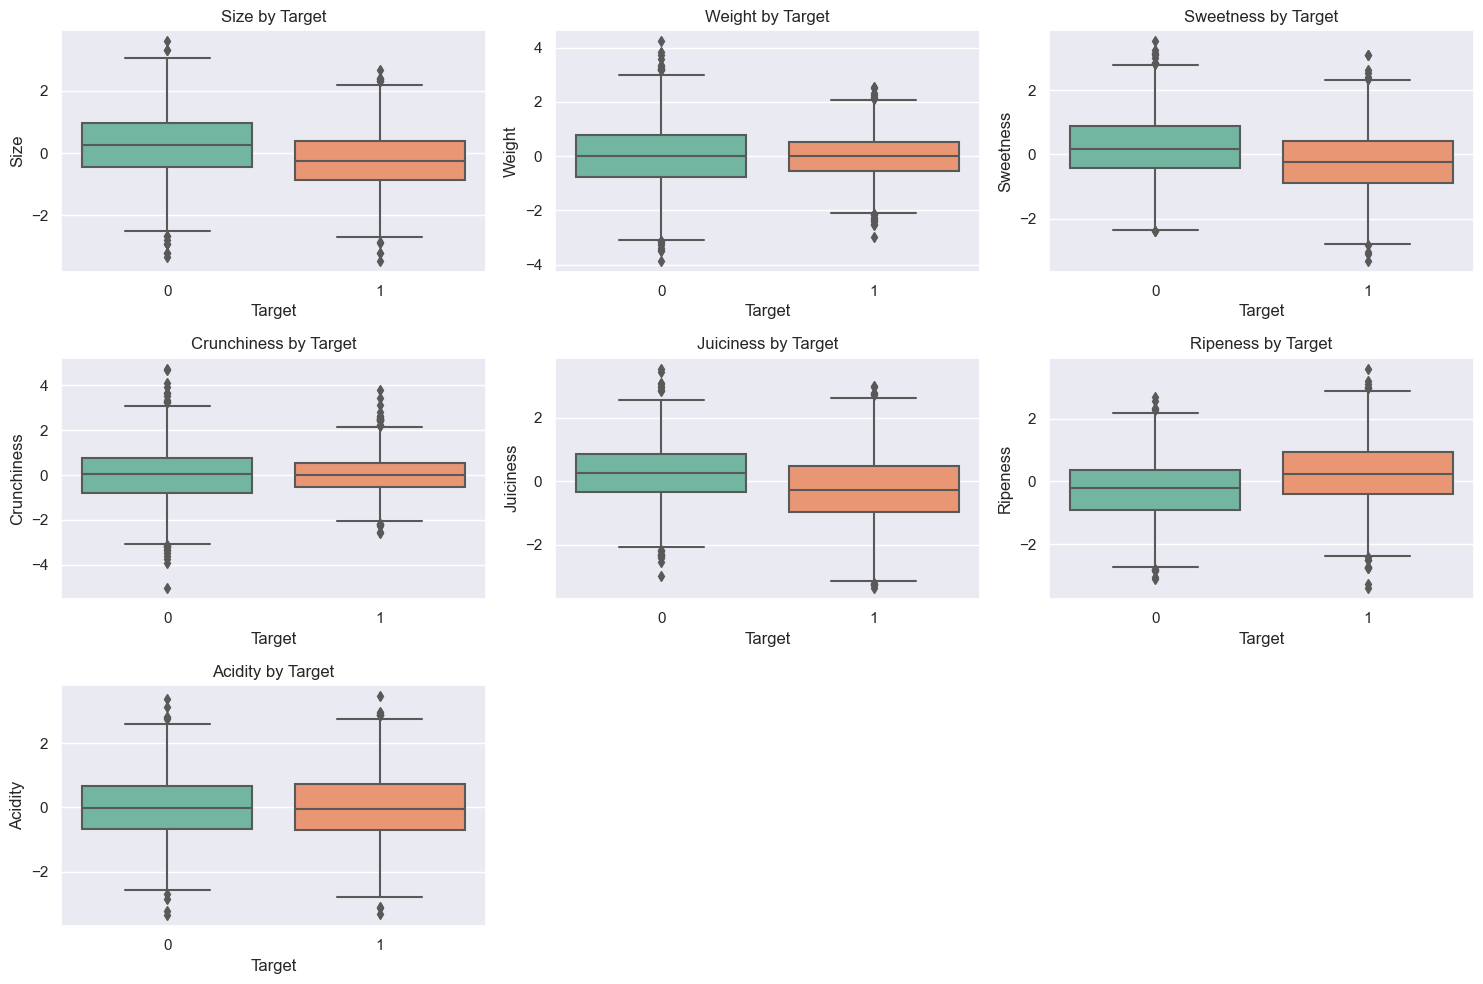

In [33]:
# Cria uma nova figura para os gráficos, definindo o tamanho da figura como 15x10 polegadas.
plt.figure(figsize=(15, 10))

# Define a paleta de cores "Set2" para ser usada nos gráficos.
sns.set_palette("Set2")

# Inicia um loop para criar um boxplot para cada coluna, exceto a última coluna 'Target'.
# `df_clean.columns[:-1]` seleciona todas as colunas menos a última.
for i, column in enumerate(df_clean.columns[:-1]):  
    # Cria um subplot em uma grade de 3x3 (3 linhas e 3 colunas).
    # 'i + 1' indica a posição do subplot atual (começando de 1).
    plt.subplot(3, 3, i + 1)
    
    # Cria um boxplot para a coluna atual.
    # 'x=Target' especifica a coluna 'Target' para o eixo x (categorias).
    # 'y=column' especifica a coluna atual para o eixo y (valores).
    # 'data=df_clean' especifica o DataFrame a ser usado.
    sns.boxplot(x='Target', y=column, data=df_clean)
    
    # Define o título do subplot com o nome da coluna atual e indica que está sendo plotado por 'Target'.
    plt.title(f'{column} by Target')

# Ajusta o layout dos subplots para que não haja sobreposição e tudo seja visível.
plt.tight_layout()

# Exibe todos os gráficos gerados.
plt.show()


<div style="background-color: #BEBADA; padding: 15px; border-radius: 10px;">
    <p style="color: black; font-size: 14px; font-weight: bold;">
      3.2.3  Multivariate 
    </p>
</div>


c:\Users\izalo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\izalo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 800x800 with 0 Axes>

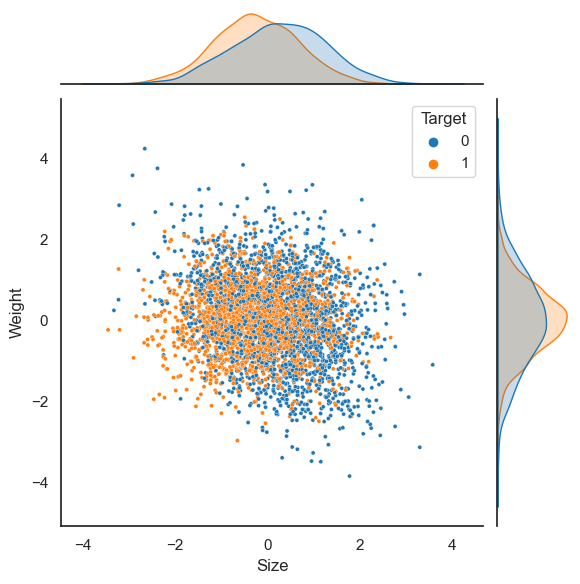

In [34]:
# Cria uma nova figura para o gráfico, definindo o tamanho da figura como 8x8 polegadas.
plt.figure(figsize=(8, 8))

# Define o estilo dos gráficos como "white", que aplica um fundo branco e remove a grade de fundo.
sns.set(style="white")

# Cria um gráfico conjunto (jointplot) que combina um gráfico de dispersão (scatter plot) com histogramas marginais.
# 'x=Size' e 'y=Weight' especificam as colunas do DataFrame a serem plotadas nos eixos x e y.
# 'hue=Target' usa a coluna 'Target' para colorir os pontos no gráfico de dispersão de acordo com suas categorias.
# 'data=df_clean' especifica o DataFrame a ser usado.
# 'palette='tab10'' define a paleta de cores a ser usada para diferentes categorias.
# 's=9' define o tamanho dos pontos no gráfico de dispersão.
sns.jointplot(x='Size', y='Weight', hue='Target', data=df_clean, palette='tab10', s=9)

# Exibe o gráfico gerado.
plt.show()


c:\Users\izalo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\izalo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 800x800 with 0 Axes>

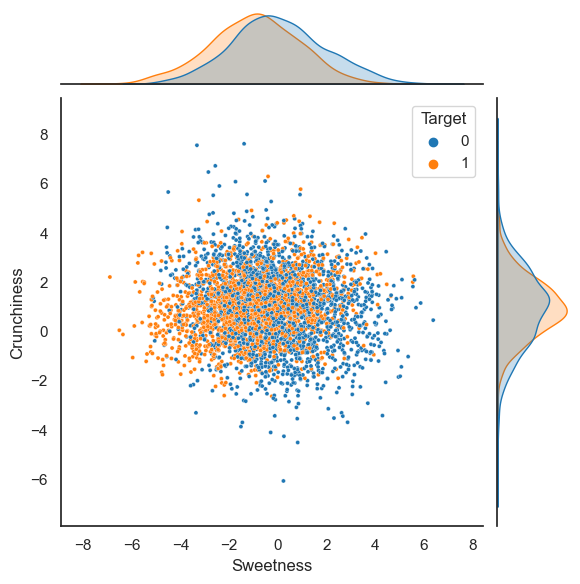

In [17]:
# Cria uma nova figura para o gráfico, definindo o tamanho da figura como 8x8 polegadas.
plt.figure(figsize=(8, 8))

# Define o estilo dos gráficos como "white", aplicando um fundo branco e removendo a grade de fundo.
sns.set(style="white")

# Cria um gráfico conjunto (jointplot) que combina um gráfico de dispersão (scatter plot) com histogramas marginais.
# 'x=Sweetness' e 'y=Crunchiness' especificam as colunas do DataFrame a serem plotadas nos eixos x e y.
# 'hue=Target' usa a coluna 'Target' para colorir os pontos no gráfico de dispersão de acordo com suas categorias.
# 'data=df_clean' especifica o DataFrame a ser usado.
# 'palette='tab10'' define a paleta de cores a ser usada para diferentes categorias.
# 's=9' define o tamanho dos pontos no gráfico de dispersão.
sns.jointplot(x='Sweetness', y='Crunchiness', hue='Target', data=df_clean, palette='tab10', s=9)

# Exibe o gráfico gerado.
plt.show()


c:\Users\izalo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\izalo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 800x800 with 0 Axes>

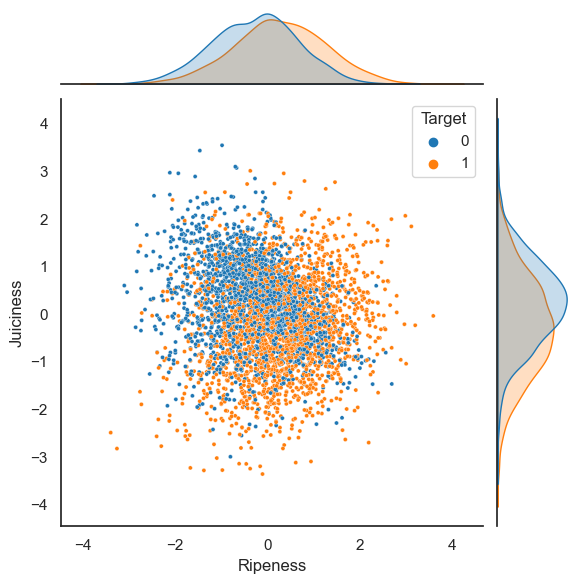

In [35]:
# Cria uma nova figura para o gráfico, definindo o tamanho da figura como 8x8 polegadas.
plt.figure(figsize=(8, 8))

# Define o estilo dos gráficos como "white", que aplica um fundo branco e remove a grade de fundo.
sns.set(style="white")

# Cria um gráfico conjunto (jointplot) que combina um gráfico de dispersão (scatter plot) com histogramas marginais.
# 'x=Ripeness' e 'y=Juiciness' especificam as colunas do DataFrame a serem plotadas nos eixos x e y, respectivamente.
# 'hue=Target' usa a coluna 'Target' para colorir os pontos no gráfico de dispersão de acordo com suas categorias.
# 'data=df_clean' especifica o DataFrame a ser usado.
# 'palette='tab10'' define a paleta de cores a ser usada para diferentes categorias.
# 's=9' define o tamanho dos pontos no gráfico de dispersão.
sns.jointplot(x='Ripeness', y='Juiciness', hue='Target', data=df_clean, palette='tab10', s=9)

# Exibe o gráfico gerado.
plt.show()


<div style="background-color: #BEBADA; padding: 15px; border-radius: 10px;">
    <p style="color: black; font-size: 14px; font-weight: bold;">
      3.3  Correlation Heatmap
    </p>
</div>


c:\Users\izalo\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


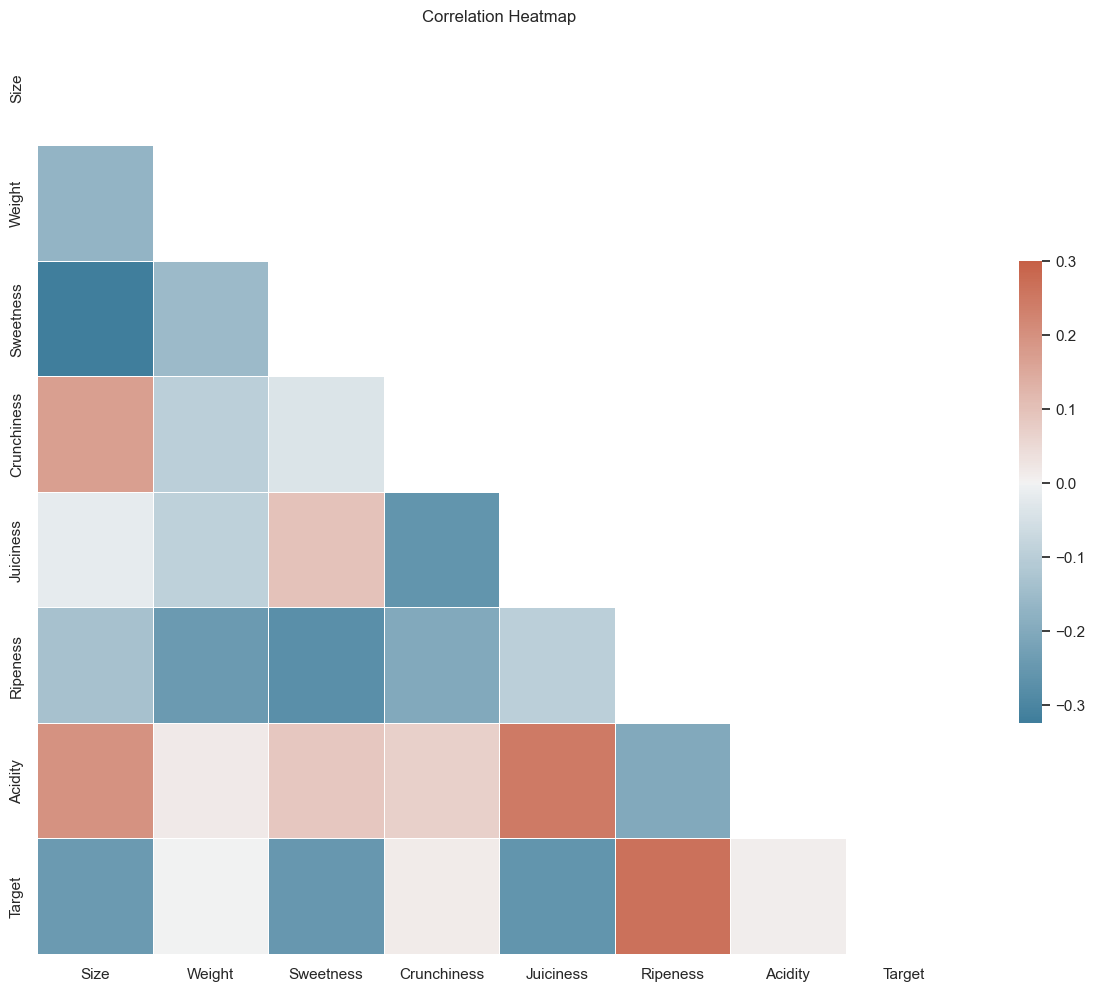

In [36]:
# Calcula a matriz de correlação entre as variáveis numéricas do DataFrame.
# A correlação mede a relação linear entre pares de variáveis.
corr = df_clean.corr()

# Cria uma máscara para a parte superior da matriz de correlação, 
# o que ajuda a mostrar apenas a parte inferior da matriz em um gráfico de calor (heatmap).
# `np.triu` cria uma matriz triangular superior com valores True na parte superior e False na parte inferior.
mask = np.triu(np.ones_like(corr, dtype=bool))

# Cria uma nova figura para o gráfico de calor, definindo o tamanho da figura como 15x12 polegadas.
plt.figure(figsize=(15, 12))

# Define uma paleta de cores divergente para o gráfico de calor, variando de azul para vermelho.
# 'as_cmap=True' retorna um colormap que pode ser usado diretamente no gráfico.
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Cria um gráfico de calor (heatmap) para visualizar a matriz de correlação.
# 'mask=mask' aplica a máscara para ocultar a parte superior da matriz.
# 'cmap=cmap' define a paleta de cores a ser usada no gráfico.
# 'vmax=.3' define o valor máximo para a escala de cores, normalizando a intensidade das cores.
# 'center=0' define o valor central da escala de cores, que é 0.
# 'square=True' faz com que os quadrados do gráfico de calor sejam proporcionais.
# 'linewidths=.5' define a largura das linhas que separam os quadrados.
# 'cbar_kws={"shrink": .5}' ajusta o tamanho da barra de cor (colorbar) para metade do tamanho padrão.
# 'annot=True' adiciona os valores numéricos dentro dos quadrados.
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

# Define o título do gráfico de calor.
plt.title('Correlation Heatmap')

# Exibe o gráfico gerado.
plt.show()


<div style="background-color: #BEBADA; padding: 15px; border-radius: 10px;">
    <p style="color: black; font-size: 14px; font-weight: bold;">
      4. Preprocesing
    </p>
</div>


<div style="background-color: #BEBADA; padding: 15px; border-radius: 10px;">
    <p style="color: black; font-size: 14px; font-weight: bold;">
      4.1  Outliers
    </p>
</div>


In [37]:
# Importa o RobustScaler e StandardScaler do módulo sklearn.preprocessing.
# Essas classes são usadas para escalonar (normalizar) características dos dados antes de treinamento de modelos.

from sklearn.preprocessing import RobustScaler, StandardScaler


In [39]:
# Define uma lista com os nomes das colunas numéricas que serão escalonadas.
numerical_features = ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']

# Cria uma instância do RobustScaler, que é usado para escalonar dados de forma robusta a outliers.
robust_scaler = RobustScaler()

# Aplica o escalonamento robusto às características numéricas do DataFrame.
# O método fit_transform ajusta o escalonador aos dados e transforma os dados com base no ajuste.
df_clean[numerical_features] = robust_scaler.fit_transform(df_clean[numerical_features])

# Define uma função para contar o número de outliers em uma série de dados.
# Outliers são definidos como valores fora do intervalo interquartílico (IQR).
def count_outliers(series):
    # Calcula o primeiro quartil (Q1) e o terceiro quartil (Q3) da série.
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    
    # Calcula o intervalo interquartílico (IQR).
    IQR = Q3 - Q1
    
    # Define os limites inferior e superior para identificar outliers.
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Conta o número de valores fora desses limites.
    return ((series < lower_bound) | (series > upper_bound)).sum()

# Itera sobre cada característica numérica para contar e exibir o número de outliers.
for feature in numerical_features:
    # Calcula o número de outliers na característica atual.
    num_outliers = count_outliers(df_clean[feature])
    
    # Exibe o número de outliers para a característica atual.
    print(f'Number of outliers in {feature}: {num_outliers}')


Number of outliers in Size: 22
Number of outliers in Weight: 54
Number of outliers in Sweetness: 32
Number of outliers in Crunchiness: 47
Number of outliers in Juiciness: 32
Number of outliers in Ripeness: 24
Number of outliers in Acidity: 20


In [40]:
# Cria uma instância do StandardScaler, que é usado para escalonar dados para que tenham média 0 e desvio padrão 1.
scaler = StandardScaler()

# Aplica o escalonamento padrão às características numéricas do DataFrame.
# O método fit_transform ajusta o escalonador aos dados e transforma os dados com base no ajuste.
df_clean[numerical_features] = scaler.fit_transform(df_clean[numerical_features])

## Save

In [41]:
# Salva o DataFrame 'df_clean' em um arquivo no formato pickle, que é uma forma de serializar objetos Python.
# O método to_pickle é usado para salvar o DataFrame em um arquivo binário, preservando sua estrutura e dados.
df_clean.to_pickle(f"{ROOT}/data/apple.pickle")
